## Sub-task 2: Dimensionality Reduction

In [20]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [6]:
# File path
file_path = r"dataset\kc_house_data.csv"

# Read the data from the CSV file
df = pd.read_csv(file_path)

# Check the number of data points in the data set
print("Number of data points in the data set: ", len(df))

Number of data points in the data set:  21613


In [4]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [37]:
# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [38]:
# Apply PCA to reduce the data to three dimensions
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

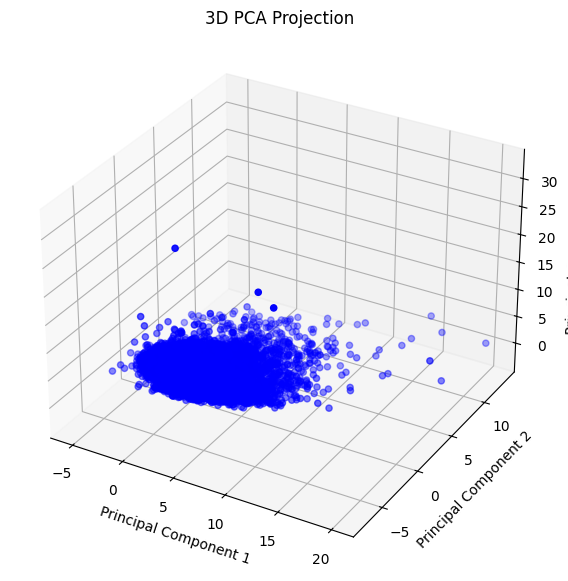

Explained variance by each component: [0.2987057  0.12710931 0.09711019]
Total explained variance: 0.5229252005136747
sqft_living      0.387681
sqft_above       0.376882
grade            0.360334
bathrooms        0.348644
sqft_living15    0.345326
price            0.298965
bedrooms         0.234539
floors           0.218493
yr_built         0.216976
long             0.158592
dtype: float64


In [39]:
# Plot the three-dimensional projection
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c='blue', marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA Projection')
plt.show()

# Evaluate the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')
print(f'Total explained variance: {explained_variance.sum()}')

# Get the loading scores for the first principal component
loading_scores = pd.Series(pca.components_[0], index=df.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_features = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_features])